# Test LeNet5 Architcture

# Importing Libraries

In [1]:
import os
from pathlib import Path

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install sklearn

In [6]:
!pip install scikit-learn

In [7]:
!pip install pillow

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline

# Designing a Convolution Neural Network (CNN): LeNet

In [9]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.conv3 = nn.Conv2d(
            in_channels=16,
            out_channels=120,
            kernel_size=5,
            stride=1,
            padding=0,
        )
        self.linear1 = nn.Linear(120, 84)
        self.linear2 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(
            self.conv3(x)
        )  # num_examples x 120 x 1 x 1 --> num_examples x 120
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x


In [10]:
model = LeNet()
print(model)


LeNet(
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=3, bias=True)
)


In [11]:
model.load_state_dict(torch.load(r"C:\Users\HP\Desktop\Model\LeNet\LeNet_With_Aug\LeNet_Updated.pth", map_location={'cuda:0': 'cpu'}))

model.eval()

LeNet(
  (relu): ReLU()
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (linear2): Linear(in_features=84, out_features=3, bias=True)
)

In [12]:
from PIL import Image

In [13]:
def make_prediciton(image_path):
    image = Image.open(image_path).convert("L")
    pretrained_size = 32
    pretrained_means = [0.5]
    pretrained_stds = [0.5]

    train_transforms = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
            ])
        
    image = train_transforms(image)    
    image = image.reshape(1, 1, 32, 32)
    predict = model(image)
    softmax = nn.Softmax(dim=1)
    predict = softmax(predict)
    probability , prediction = torch.max(predict, dim = 1)
    #converting torch tensor into numpy array
    probability = probability.detach().numpy()[0]
    prediction = prediction.detach().numpy()[0]
    
    return probability, prediction

In [14]:
# make_prediciton(test_dataset[0][0])

In [16]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\malignant\malignant (43).png")

(0.99859005, 1)

In [17]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\benign\benign (1).png")

(0.97377056, 0)

In [18]:
make_prediciton(r"C:\Users\HP\Desktop\Model\DATASET\Testing\normal\normal (1).png")

(0.7477851, 2)

In [19]:
# Hyper parameters
epochs = 30
num_classes = 3
batch_size = 32
learning_rate = 0.001

In [20]:
# CPU or GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [21]:
test_transforms = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5)),
                       ])


valid_transforms = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5)),
                       ])

In [24]:
test_dataset = torchvision.datasets.ImageFolder(root= r"C:\Users\HP\Desktop\Model\DATASET\Testing", transform = test_transforms)
# test_dataset = torchvision.datasets.ImageFolder(root= r"C:\Users\HP\Desktop\Model\DATASET", transform = test_transforms)

In [25]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 155
    Root location: C:\Users\HP\Desktop\Model\DATASET\Testing
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [26]:
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=True, num_workers=2)

In [27]:
from tqdm import tqdm

In [28]:
test_dataset[100]

(tensor([[[-0.9294, -0.8745, -0.8667,  ..., -0.5059, -0.5059, -0.6157],
          [-0.9608, -0.9529, -0.9216,  ..., -0.4588, -0.4745, -0.4980],
          [-0.9529, -0.9294, -0.8431,  ..., -0.4275, -0.4980, -0.5294],
          ...,
          [-0.9294, -0.9216, -0.9216,  ..., -0.5137, -0.4824, -0.6706],
          [-0.9216, -0.9294, -0.9294,  ..., -0.6392, -0.7490, -0.8196],
          [-0.9294, -0.9294, -0.9294,  ..., -0.7255, -0.8039, -0.8745]]]),
 1)

In [29]:
preds = []
target = []
probabilities = []
individual_prob = []

for images, labels in tqdm(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            outputs = nn.Softmax(dim=1)(outputs)
            prob, predicted = torch.max(outputs.data, 1)
            #Tensor from GPU to CPU by converting pytorch numpy to tensor array
            predicted = predicted.cpu().numpy()
            outputs = outputs.cpu().detach().numpy()
            prob = prob.cpu().detach().numpy()
            labels = labels.cpu().numpy()
            preds.append(predicted)
            target.append(labels)
            #Finding probabilies for each probabilities
            probabilities.append(list(outputs))
            individual_prob.append(list(prob))
            
        

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.38s/it]


Converting 2-D into 1-D array

In [30]:
probabilities1 = []
individual_prob1 = []
preds1 = []
target1 = []

for i in probabilities:
  for j in i:
    probabilities1.append(j)

for i in individual_prob:
  for j in i:
    individual_prob1.append(j)
    
for i in preds:
  for j in i:
    preds1.append(j)
    
for i in target:
  for j in i:
    target1.append(j)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
accuracy_score(target1,preds1)

0.8129032258064516

In [33]:
print(classification_report(target1,preds1))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        87
           1       0.76      0.69      0.72        42
           2       0.68      0.88      0.77        26

    accuracy                           0.81       155
   macro avg       0.78      0.81      0.79       155
weighted avg       0.82      0.81      0.81       155



In [34]:
confusion_matrix(target1,preds1)

array([[74,  8,  5],
       [ 7, 29,  6],
       [ 2,  1, 23]], dtype=int64)

In [35]:
import matplotlib.pyplot as plt
import numpy
from sklearn .metrics import roc_auc_score, roc_curve
import seaborn as sns


In [36]:
test_dataset.classes

['benign', 'malignant', 'normal']

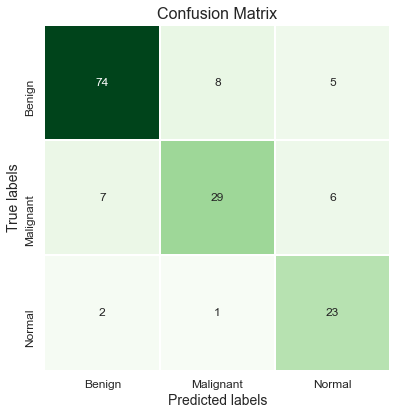

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cm(confusion):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", square=True, 
                cbar=False, annot_kws={"size": 12}, linewidths=0.5)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.ylabel('True labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    classes = ['Benign', 'Malignant', 'Normal'] 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks + 0.5, classes, fontsize=12)
    plt.yticks(tick_marks + 0.5, classes, fontsize=12)
    plt.tight_layout()
    plt.show()

from sklearn.metrics import confusion_matrix

# Assuming target1 and preds1 are the true labels and predicted labels, respectively
confusion = confusion_matrix(target1, preds1, labels=[0, 1, 2])
plot_cm(confusion)


In [38]:
auc = np.round(roc_auc_score(target1, probabilities1, multi_class = 'ovr'), 3)
print("Auc score for our sample data is {}". format(auc))

Auc score for our sample data is 0.909


In [39]:
probabilities2 = np.array([i for i in probabilities1])

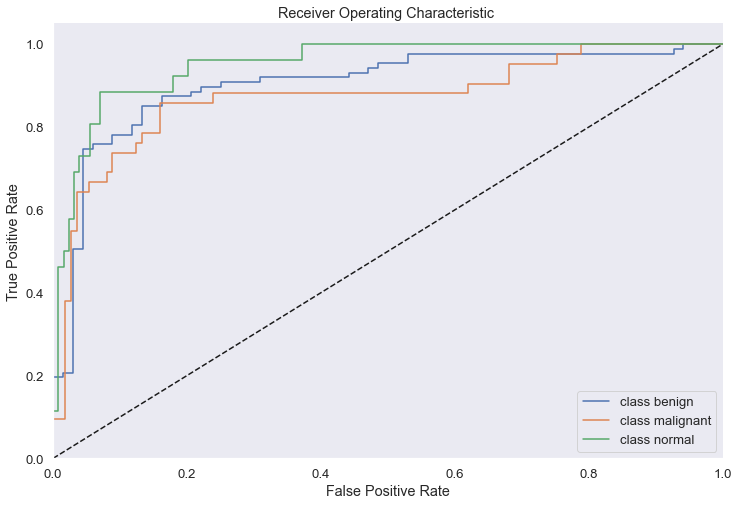

In [40]:
def plot_multiclass_roc(y_score, y_test, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    threshold = dict()

    for i in range(n_classes):    
      fpr[i], tpr[i], threshold[i] = roc_curve(target1, probabilities2[:,i], pos_label=i)
    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic ')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label = 'class '+ test_dataset.classes[i])
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(probabilities2, target1, n_classes=3, figsize=(12,8))